In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
def black_scholes_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(
        -r * T
    ) * norm.cdf(d2)
    rho = T * K * np.exp(-r * T) * norm.cdf(d2)

    return delta, gamma, vega, theta, rho

In [27]:
def generate_greeks_by_t(S_range, K, T_range, r, sigma):
    delta_data = np.zeros((len(S_range), len(T_range)))
    gamma_data = np.zeros((len(S_range), len(T_range)))
    vega_data = np.zeros((len(S_range), len(T_range)))
    theta_data = np.zeros((len(S_range), len(T_range)))
    rho_data = np.zeros((len(S_range), len(T_range)))

    for i, S in enumerate(S_range):
        for j, T in enumerate(T_range):
            delta, gamma, vega, theta, rho = black_scholes_greeks(S, K, T, r, sigma)
            delta_data[i, j] = delta
            gamma_data[i, j] = gamma
            vega_data[i, j] = vega
            theta_data[i, j] = theta
            rho_data[i, j] = rho

    return delta_data, gamma_data, vega_data, theta_data, rho_data


def generate_greeks_by_iv(S_range, K, T, r, sigma_range):
    delta_data = np.zeros((len(S_range), len(sigma_range)))
    gamma_data = np.zeros((len(S_range), len(sigma_range)))
    vega_data = np.zeros((len(S_range), len(sigma_range)))
    theta_data = np.zeros((len(S_range), len(sigma_range)))
    rho_data = np.zeros((len(S_range), len(sigma_range)))

    for i, S in enumerate(S_range):
        for j, sigma in enumerate(sigma_range):
            delta, gamma, vega, theta, rho = black_scholes_greeks(S, K, T, r, sigma)
            delta_data[i, j] = delta
            gamma_data[i, j] = gamma
            vega_data[i, j] = vega
            theta_data[i, j] = theta
            rho_data[i, j] = rho

    return delta_data, gamma_data, vega_data, theta_data, rho_data

In [28]:
# Parameters

K = 100  # Strike price
r = 0.05  # Risk-free rate

S_min = 50
S_max = 150
S_range = np.linspace(S_min, S_max, 100)  # Spot prices

T = 0.5
T_min = 0.01
T_max = 1
T_range = np.linspace(T_min, T_max, 100)  # Time to expiration (in years)

sigma = 0.25
sigma_min = 0.1
sigma_max = 0.7
sigma_range = np.linspace(sigma_min, sigma_max, 100)  # Implied volatility


# Generate data
delta_t, gamma_t, vega_t, theta_t, rho_t = generate_greeks_by_t(
    S_range, K, T_range, r, sigma
)
delta_iv, gamma_iv, vega_iv, theta_iv, rho_iv = generate_greeks_by_iv(
    S_range, K, T, r, sigma_range
)


# Create meshgrid for surface plots
S_mesh_t, T_mesh = np.meshgrid(S_range, T_range)
S_mesh_iv, sigma_mesh = np.meshgrid(S_range, sigma_range)

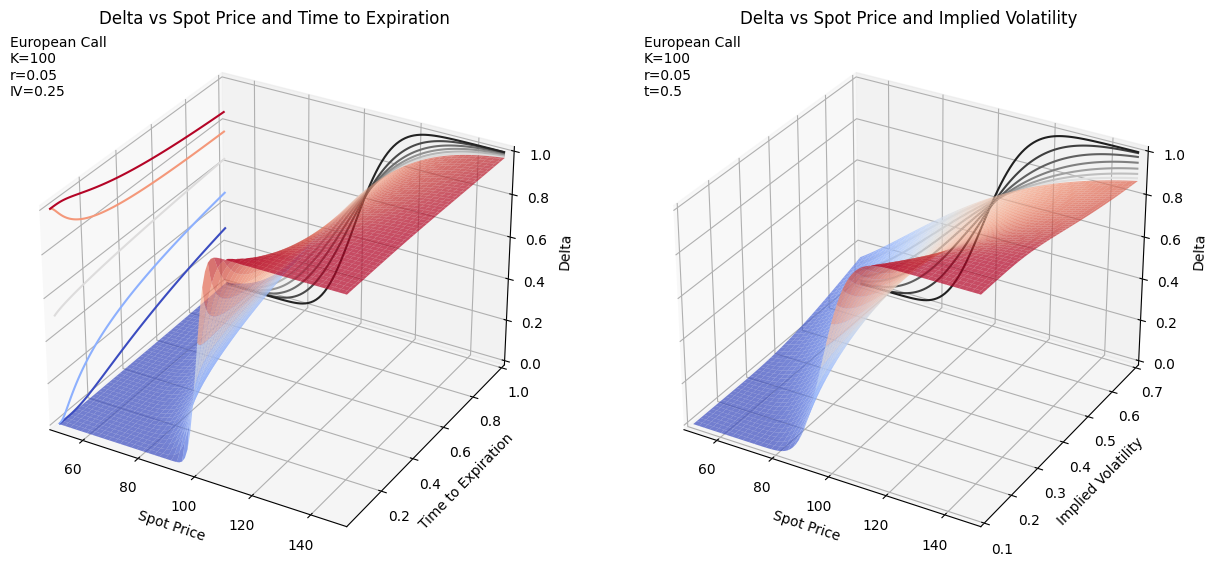

In [29]:
# Plotting
fig = plt.figure(figsize=(15, 10))


# Delta-Time Surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_title("Delta vs Spot Price and Time to Expiration")
ax1.set_xlabel("Spot Price")
ax1.set_ylabel("Time to Expiration")
ax1.set_zlabel("Delta")
ax1.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nIV={sigma}", transform=ax1.transAxes)

ax1.set(xlim=(S_min, S_max), ylim=(T_min, T_max), zlim=(0, 1))
ax1.plot_surface(
    S_mesh_t, T_mesh, delta_t.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)

ax1.contour(
    S_mesh_t,
    T_mesh,
    delta_t.T,
    zdir="x",
    offset=S_min,
    levels=np.linspace(80, 120, 5),
    cmap="coolwarm",
)
ax1.contour(S_mesh_t, T_mesh, delta_t.T, zdir="y", offset=T_max, cmap="binary_r")


# Delta-IV Surface
ax2 = fig.add_subplot(122, projection="3d")
ax2.set_title("Delta vs Spot Price and Implied Volatility")
ax2.set_xlabel("Spot Price")
ax2.set_ylabel("Implied Volatility")
ax2.set_zlabel("Delta")
ax2.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nt={T}", transform=ax2.transAxes)

ax2.set(xlim=(S_min, S_max), ylim=(sigma_min, sigma_max), zlim=(0, 1))
ax2.plot_surface(
    S_mesh_iv, sigma_mesh, delta_iv.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)

ax2.contour(
    S_mesh_iv, sigma_mesh, delta_iv.T, zdir="y", offset=sigma_max, cmap="binary_r"
)


plt.show()

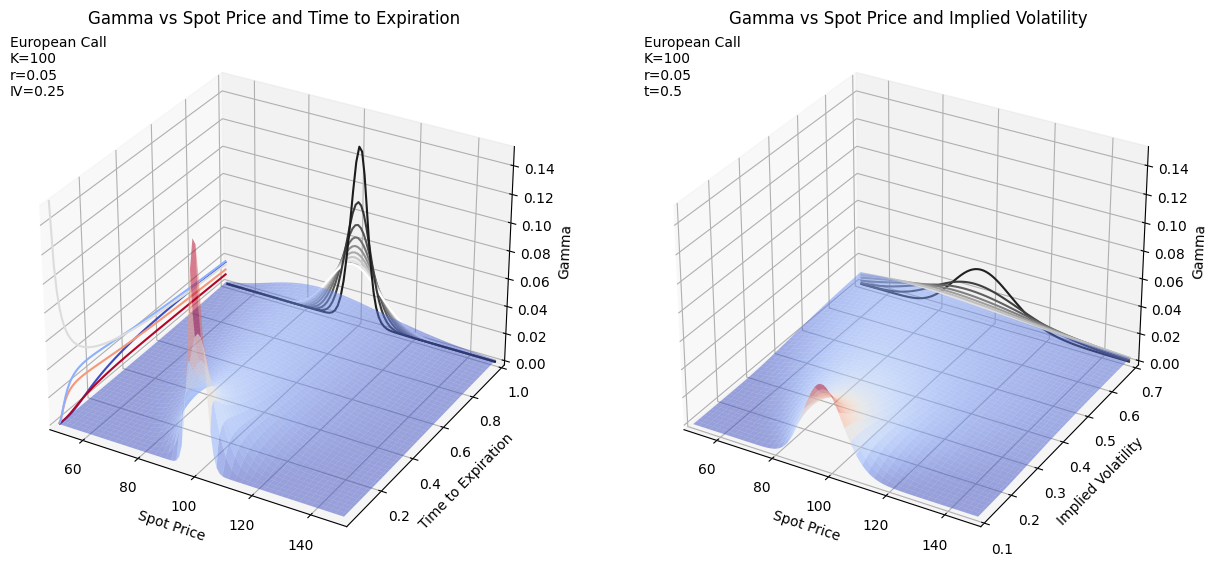

In [30]:
# Plotting
fig = plt.figure(figsize=(15, 10))

# Gamma-Time Surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_title("Gamma vs Spot Price and Time to Expiration")
ax1.set_xlabel("Spot Price")
ax1.set_ylabel("Time to Expiration")
ax1.set_zlabel("Gamma")
ax1.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nIV={sigma}", transform=ax1.transAxes)

ax1.set(xlim=(S_min, S_max), ylim=(T_min, T_max), zlim=(0, 0.15))
ax1.plot_surface(
    S_mesh_t, T_mesh, gamma_t.T, cmap="coolwarm", edgecolor="none", alpha=0.5
)

ax1.contour(
    S_mesh_t,
    T_mesh,
    gamma_t.T,
    zdir="y",
    offset=T_max,
    levels=np.linspace(0, 0.15, 10),
    cmap="binary_r",
)
ax1.contour(
    S_mesh_t,
    T_mesh,
    gamma_t.T,
    zdir="x",
    offset=S_min,
    levels=np.linspace(80, 120, 5),
    cmap="coolwarm",
)


# Gamma-IV Surface
ax2 = fig.add_subplot(122, projection="3d")
ax2.set_title("Gamma vs Spot Price and Implied Volatility")
ax2.set_xlabel("Spot Price")
ax2.set_ylabel("Implied Volatility")
ax2.set_zlabel("Gamma")
ax2.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nt={T}", transform=ax2.transAxes)

ax2.set(xlim=(S_min, S_max), ylim=(sigma_min, sigma_max), zlim=(0, 0.15))
ax2.plot_surface(
    S_mesh_iv, sigma_mesh, gamma_iv.T, cmap="coolwarm", edgecolor="none", alpha=0.5
)

ax2.contour(
    S_mesh_iv, sigma_mesh, gamma_iv.T, zdir="y", offset=sigma_max, cmap="binary_r"
)


plt.show()

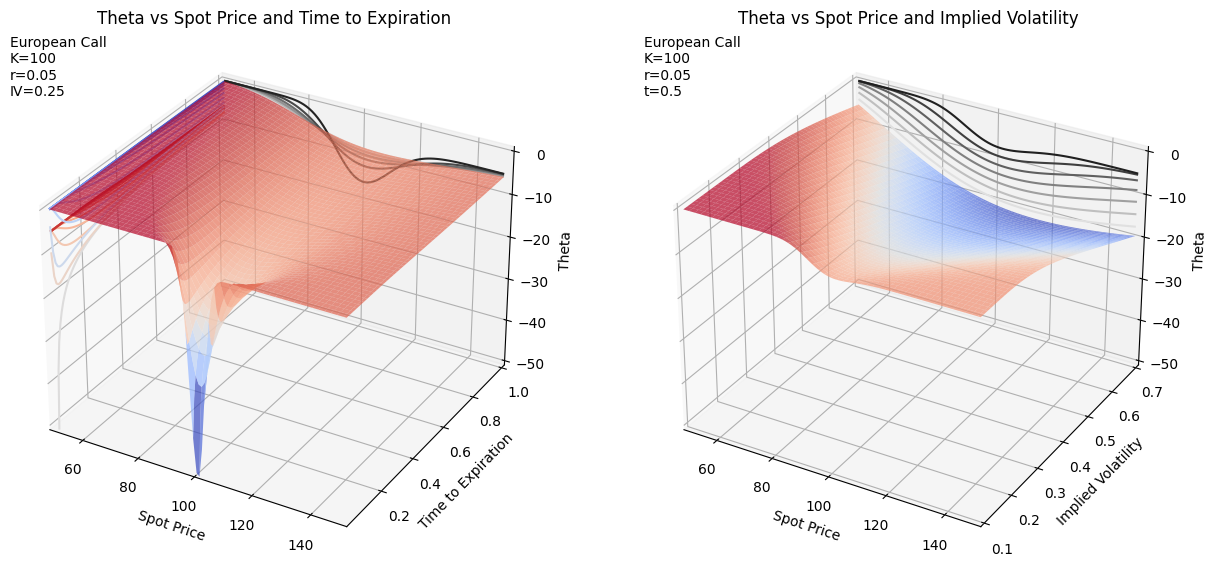

In [31]:
# Plotting
fig = plt.figure(figsize=(15, 10))

# Theta-Time Surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_title("Theta vs Spot Price and Time to Expiration")
ax1.set_xlabel("Spot Price")
ax1.set_ylabel("Time to Expiration")
ax1.set_zlabel("Theta")
ax1.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nIV={sigma}", transform=ax1.transAxes)

ax1.set(xlim=(S_min, S_max), ylim=(T_min, T_max), zlim=(-50, 0))
ax1.plot_surface(
    S_mesh_t, T_mesh, theta_t.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)

ax1.contour(
    S_mesh_t,
    T_mesh,
    theta_t.T,
    zdir="x",
    offset=S_min,
    levels=np.linspace(50, 150, 19),
    cmap="coolwarm",
)
ax1.contour(S_mesh_t, T_mesh, theta_t.T, zdir="y", offset=T_max, cmap="binary_r")


# Theta-IV Surface
ax2 = fig.add_subplot(122, projection="3d")
ax2.set_title("Theta vs Spot Price and Implied Volatility")
ax2.set_xlabel("Spot Price")
ax2.set_ylabel("Implied Volatility")
ax2.set_zlabel("Theta")
ax2.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nt={T}", transform=ax2.transAxes)

ax2.set(xlim=(S_min, S_max), ylim=(sigma_min, sigma_max), zlim=(-50, 0))
ax2.plot_surface(
    S_mesh_iv, sigma_mesh, theta_iv.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)

ax2.contour(
    S_mesh_iv, sigma_mesh, theta_iv.T, zdir="y", offset=sigma_max, cmap="binary_r"
)


plt.show()

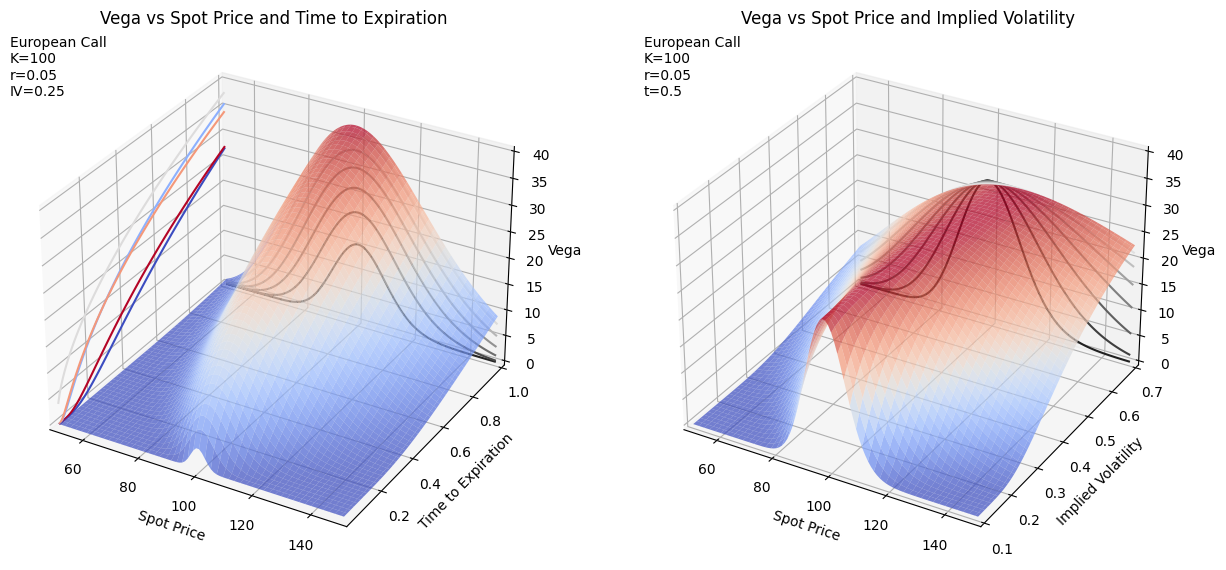

In [32]:
# Plotting
fig = plt.figure(figsize=(15, 10))

# Vega-Time Surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_title("Vega vs Spot Price and Time to Expiration")
ax1.set_xlabel("Spot Price")
ax1.set_ylabel("Time to Expiration")
ax1.set_zlabel("Vega")
ax1.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nIV={sigma}", transform=ax1.transAxes)

ax1.set(xlim=(S_min, S_max), ylim=(T_min, T_max), zlim=(0, 40))
ax1.plot_surface(
    S_mesh_t, T_mesh, vega_t.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)

ax1.contour(S_mesh_t, T_mesh, vega_t.T, zdir="y", offset=T_max, cmap="binary_r")
ax1.contour(
    S_mesh_t,
    T_mesh,
    vega_t.T,
    zdir="x",
    offset=S_min,
    levels=np.linspace(80, 120, 5),
    cmap="coolwarm",
)


# Vega-IV Surface
ax2 = fig.add_subplot(122, projection="3d")
ax2.set_title("Vega vs Spot Price and Implied Volatility")
ax2.set_xlabel("Spot Price")
ax2.set_ylabel("Implied Volatility")
ax2.set_zlabel("Vega")
ax2.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nt={T}", transform=ax2.transAxes)

ax2.set(xlim=(S_min, S_max), ylim=(sigma_min, sigma_max), zlim=(0, 40))
ax2.plot_surface(
    S_mesh_iv, sigma_mesh, vega_iv.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)
ax2.contour(
    S_mesh_iv, sigma_mesh, vega_iv.T, zdir="y", offset=sigma_max, cmap="binary_r"
)


plt.show()

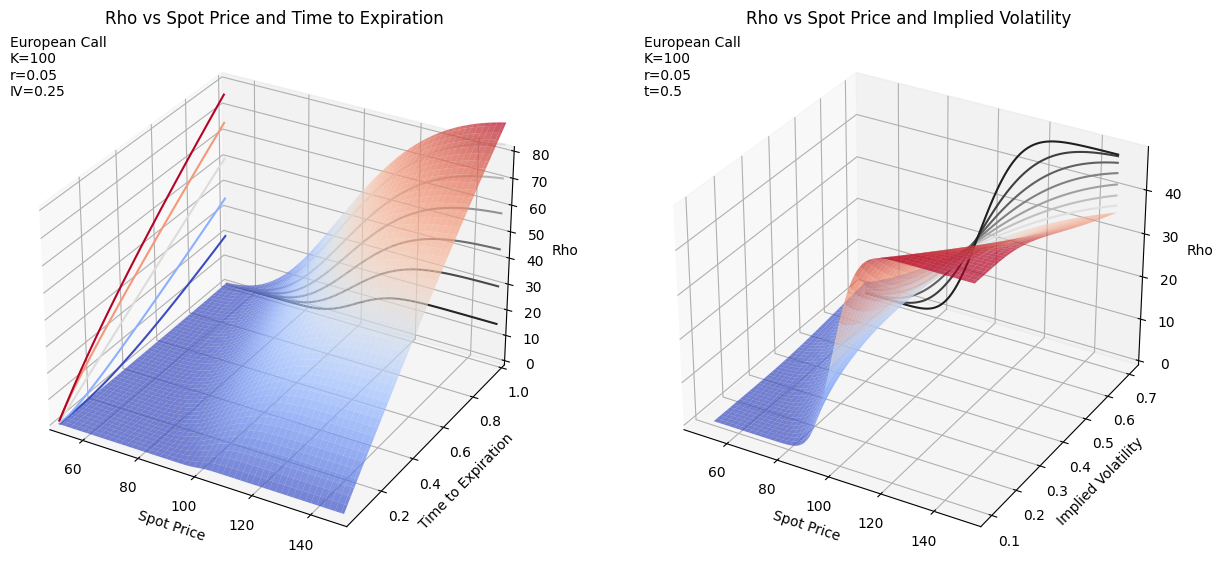

In [33]:
# Plotting
fig = plt.figure(figsize=(15, 10))


# Rho-Time Surface
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_title("Rho vs Spot Price and Time to Expiration")
ax1.set_xlabel("Spot Price")
ax1.set_ylabel("Time to Expiration")
ax1.set_zlabel("Rho")
ax1.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nIV={sigma}", transform=ax1.transAxes)

ax1.set(xlim=(S_min, S_max), ylim=(T_min, T_max), zlim=(0, 80))
ax1.plot_surface(
    S_mesh_t, T_mesh, rho_t.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)

ax1.contour(S_mesh_t, T_mesh, rho_t.T, zdir="y", offset=T_max, cmap="binary_r")
ax1.contour(
    S_mesh_t,
    T_mesh,
    rho_t.T,
    zdir="x",
    offset=S_min,
    levels=np.linspace(80, 120, 5),
    cmap="coolwarm",
)


# Rho-IV Surface
ax2 = fig.add_subplot(122, projection="3d")
ax2.set_title("Rho vs Spot Price and Implied Volatility")
ax2.set_xlabel("Spot Price")
ax2.set_ylabel("Implied Volatility")
ax2.set_zlabel("Rho")
ax2.text2D(0, 0.88, f"European Call\nK={K}\nr={r}\nt={T}", transform=ax2.transAxes)

ax2.plot_surface(
    S_mesh_iv, sigma_mesh, rho_iv.T, cmap="coolwarm", edgecolor="none", alpha=0.7
)
ax2.contour(
    S_mesh_iv, sigma_mesh, rho_iv.T, zdir="y", offset=sigma_max, cmap="binary_r"
)


plt.show()